In [1]:
from array import array
import math
import numpy as np

In [2]:
def generator_function(x,par,ichoice):
    if (ichoice == 5):
        return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x
    elif (ichoice ==6):
        return par[0]+par[1]*x+par[2]*x*x
    else:
        return par[0]+par[1]*x

In [3]:
def fitfunction(x,*paramlist):
    if (ichoice == 5):
        return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x+paramlist[3]*x*x*x
    elif (ichoice ==6):
        return paramlist[0]+paramlist[1]*x+paramlist[2]*x*x
    else:
        return paramlist[0]+paramlist[1]*x

In [4]:
ichoice = 4

In [5]:
if ichoice == 1:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 2:
    m = 1
    n = 10
    par = []
    par.append(6.81)
    par.append(0.656)
    par = np.array(par)
    jitter = [.3,.2,-.5,-.2,.2,.6,-.4,-1.5,.7,.5]
    jitter = np.array(par)
    sigma = [0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51,0.51]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = 41.0
    xhigh = 50.0
elif ichoice == 3:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [.7,6,5,4,3,2,1,.5,1,2,3,4,5,6,.7]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 4:
    m = 1
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    sigma = np.array(sigma)
    Title = "Linear Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 5:
    m = 3
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par.append(0.00)
    par.append(0.20)
    par = np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [7,6,5,4,3,2,1,.5,1,2,3,4,5,6,7]
    sigma = np.array(sigma)
    Title = "Cubic Fit"
    xlow = -4.0
    xhigh = 4.0
elif ichoice == 6:
    m = 2
    n = 15
    par = []
    par.append(1.80)
    par.append(4.05)
    par.append(5.10)
    par=np.array(par)
    jitter = [-2,2,-1,1,0,-2,2,-1,1,0,-2,2,-1,1,0]
    jitter = np.array(jitter)
    sigma = [1,2,3,4,5,6,7,8,7,6,5,4,3,2,1]
    sigma = np.array(sigma)
    Title = "Quadratic Fit"
    xlow = -4.0
    xhigh = 4.0
else:
    print("Invalid choice!!!!")

In [6]:
x = [0.0 for i in range(n)]
y = [0.0 for i in range(n)]
ex = [0.0 for i in range(n)]
ey = [0.0 for i in range(n)]
x = np.array(x)
y = np.array(y)
ex = np.array(ex)
ey = np.array(ey)

rootfitstring = "pol"+str(m)

In [7]:
for i in range(0,n):
    x[i]=float(xlow+(xhigh-xlow)*i/(n-1))
    y[i]=float(generator_function(x[i],par,ichoice)+jitter[i])
    ex[i]=float(0.0)
    ey[i]=float(sigma[i])
    
print(x,y,ex,ey)

[-4.         -3.42857143 -2.85714286 -2.28571429 -1.71428571 -1.14285714
 -0.57142857  0.          0.57142857  1.14285714  1.71428571  2.28571429
  2.85714286  3.42857143  4.        ] [-16.4        -10.08571429 -10.77142857  -6.45714286  -5.14285714
  -4.82857143   1.48571429   0.8          5.11428571   6.42857143
   6.74285714  13.05714286  12.37142857  16.68571429  18.        ] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [1. 2. 3. 4. 5. 6. 7. 8. 7. 6. 5. 4. 3. 2. 1.]


In [8]:
m_params = m + 1
a = np.zeros(shape = (m_params,m_params))
v = np.zeros(shape = (m_params,1))

In [9]:
for k in range(0,m_params):
    for i in range(0,n):
        v[k][0]=v[k][0]+y[i]*math.pow(x[i],k)/math.pow(ey[i],2)
    #print ("v[%d] = %f" % (k,v[k][0]))
    for j in range(0,m_params):
        for i in range(0,n):
            a[k][j]=a[k][j]+math.pow(x[i],k+j)/math.pow(ey[i],2)
        #print ("a[%d][%d] = %f" %(k,j,a[k][j]))
        
print ("A matrix = ")        
print (a)
print("V matrix = ")
print (v)

ainv = np.linalg.inv(a)
u1 = np.dot(a,ainv)

print ("A_inverse = ")
print (ainv)
print ("Diagonal Check:")
print (u1)
coeff = ainv*np.matrix(v)
print ("Coefficients:")
for k in range(0,m+1):
    print("k = %d, coeff = %f +/- %f" % (k,coeff[k],math.pow(ainv[k][k],0.5)))

A matrix = 
[[ 3.0392191   0.        ]
 [ 0.         40.66566338]]
V matrix = 
[[  4.0959161 ]
 [171.89633838]]
A_inverse = 
[[0.32903189 0.        ]
 [0.         0.02459077]]
Diagonal Check:
[[1. 0.]
 [0. 1.]]
Coefficients:
k = 0, coeff = 1.347687 +/- 0.573613
k = 1, coeff = 4.227063 +/- 0.156814


In [10]:
yfit = 0
chi2 = 0

for i in range(0,n):
    for j in range(0,m+1):
        yfit = yfit + coeff[j]*math.pow(x[i],j)
    print ("i = %d  y = %f  yfit = %f" % (i,y[i],yfit))
    chi2 = chi2 + math.pow(((yfit-y[i])/ey[i]),2)
    yfit = 0
    
chi2perdof = chi2/(n-m)
print ("chi2/dof = %f / %f" % (chi2,(n-m-1)))

rho = np.zeros(shape = (m_params,m_params))

for k in range(0,m_params):
    for j in range(0,m_params):
        rho[k][j]=rho[k][j]+ainv[k][j]/math.sqrt(ainv[k][k]*ainv[j][j])    
print (rho)

i = 0  y = -16.400000  yfit = -15.560567
i = 1  y = -10.085714  yfit = -13.145102
i = 2  y = -10.771429  yfit = -10.729637
i = 3  y = -6.457143  yfit = -8.314172
i = 4  y = -5.142857  yfit = -5.898707
i = 5  y = -4.828571  yfit = -3.483243
i = 6  y = 1.485714  yfit = -1.067778
i = 7  y = 0.800000  yfit = 1.347687
i = 8  y = 5.114286  yfit = 3.763152
i = 9  y = 6.428571  yfit = 6.178617
i = 10  y = 6.742857  yfit = 8.594081
i = 11  y = 13.057143  yfit = 11.009546
i = 12  y = 12.371429  yfit = 13.425011
i = 13  y = 16.685714  yfit = 15.840476
i = 14  y = 18.000000  yfit = 18.255941
chi2/dof = 4.276787 / 13.000000
[[1. 0.]
 [0. 1.]]


In [11]:
xfiterr = array('d')
yfiterr = array('d')
yfitplus2 = array('d')
yfitminus2 = array('d')

for i in range(0,n):
    xfiterr.append(xlow+(xhigh-xlow)*i/(n-1))
    yerror2 = 0.0
    yval = 0.0
    for k in range(0,m+1):
        for j in range(0,m+1):
            term = rho[k][j]*math.pow(xfiterr[i],k)*math.pow(ainv[k][k],0.5)*(math.pow(xfiterr[i],j)*math.pow(ainv[j][j],0.5))
            #print (k,j,term)
            yerror2 = yerror2 + term
        yval = yval + coeff[k]*math.pow(xfiterr[i],k)
    yfiterr.append(yval)
    yfitplus2.append(yval+math.sqrt(yerror2))
    yfitminus2.append(yval-math.sqrt(yerror2))
    print(i,xfiterr[i],yval,math.sqrt(yerror2),yfitplus2[i],yfitminus2[i])

0 -4.0 [[-15.5605667]] 0.8499907163128954 -14.710575980762014 -16.410557413387806
1 -3.428571428571429 [[-13.14510188]] 0.7861926645747299 -12.35890921756321 -13.93129454671267
2 -2.857142857142857 [[-10.72963707]] 0.7278549804812415 -10.001782086719725 -11.457492047682209
3 -2.2857142857142856 [[-8.31417225]] 0.6763919855814476 -7.637780266682548 -8.990564237845444
4 -1.7142857142857144 [[-5.89870744]] 0.6334813671083848 -5.26522607021864 -6.53218880443541
5 -1.1428571428571428 [[-3.48324262]] 0.6009579399221155 -2.8822846824679376 -4.084200562312168
6 -0.5714285714285716 [[-1.06777781]] 0.5805700021570077 -0.4872078052960749 -1.6483478096100903
7 0.0 [[1.34768701]] 0.5736130124229862 1.9213000199068757 0.7740739950609034
8 0.5714285714285712 [[3.76315182]] 0.5805700021570077 4.343721824577868 3.1825818202638523
9 1.1428571428571432 [[6.17861664]] 0.6009579399221155 6.779574577279949 5.5776586974357185
10 1.7142857142857144 [[8.59408145]] 0.6334813671083848 9.22756281940319 7.96060008

Welcome to JupyROOT 6.18/00
Fit 1: 4.276787 13.000000 



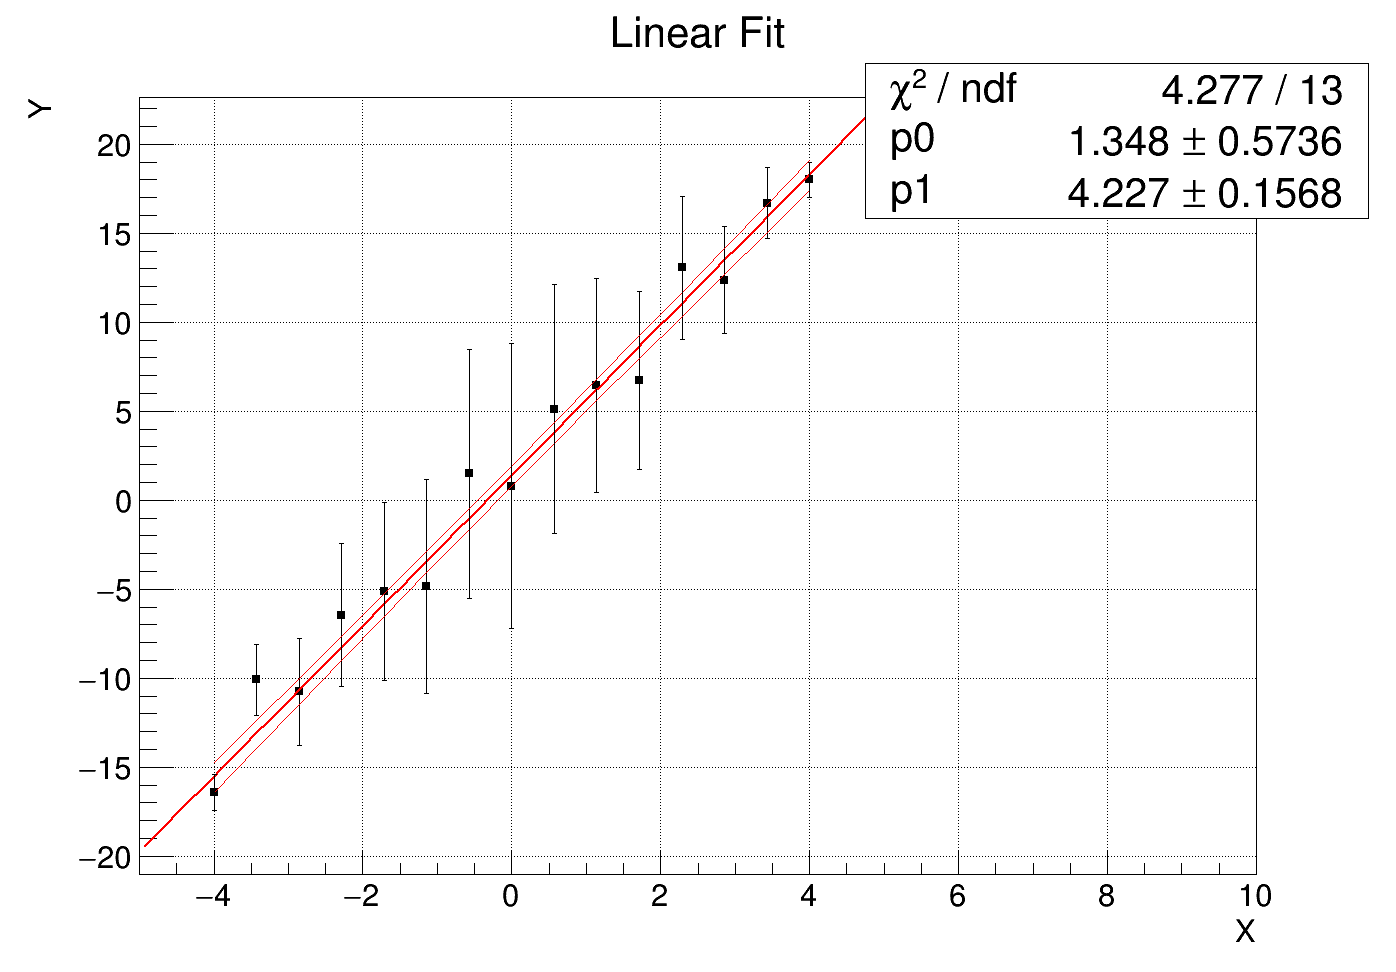

In [12]:
#print (n,x,y)

from ROOT import TCanvas, TFile
from ROOT import TGraph, TF1, TGraphErrors
from ROOT import gStyle
gStyle.SetOptFit(1)

c1 = TCanvas( 'c1', 'Error Band Fitting Example', 200, 10, 1400, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

gr = TGraphErrors(n,x,y,ex,ey)
grp = TGraph(n,xfiterr,yfitplus2)
grm = TGraph(n,xfiterr,yfitminus2)

pfit1 = TF1("pfit1",rootfitstring)

gr.SetMarkerStyle(21)
gr.SetTitle(Title)
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.GetXaxis().SetLimits(xlow-1.0,xhigh+6.0) 
#gr.GetHistogram().SetMaximum(5.0)
#gr.GetHistogram().SetMinimum(0.0)
gr.Fit("pfit1","q")
pfit1chi2 = pfit1.GetChisquare()
pfit1ndf = pfit1.GetNDF()
pfit1chi2ndf = pfit1chi2/pfit1ndf
print("Fit 1: %f %f \n" % (pfit1chi2,pfit1ndf))
gr.Draw("AP")
grp.SetLineColor(2)
grm.SetLineColor(2)
grp.Draw("L")
grm.Draw("L")
c1.Draw()

Coefficients (from curve_fit)
[1.34768701 4.22706343]
Covariance Matrix (from curve_fit)
[[ 3.29031887e-01 -2.54835306e-12]
 [-2.54835306e-12  2.45907706e-02]]
Chi^2 / dof = 4.277E+00 / 13
Fit Parameter 0: 1.348E+00 +/- 5.736E-01
0 1 -2.833E-11
Fit Parameter 1: 4.227E+00 +/- 1.568E-01


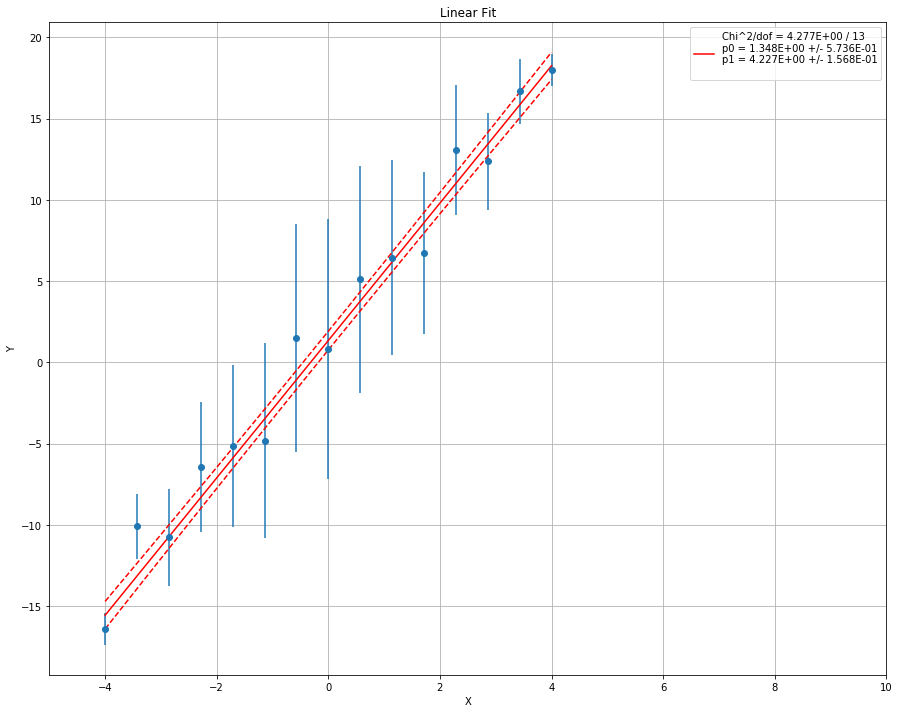

In [15]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title(Title)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlim(xlow-1,xhigh+6)
ax1.set_yscale("linear",nonposy='clip')
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')

init_vals = [0.0 for x in range(0,m_params)]
popt, pcov = curve_fit(fitfunction,x,y,p0=init_vals,sigma=sigma,absolute_sigma=True)

xi = np.linspace(np.min(x),np.max(x),100)
ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])
lower = np.percentile(ysample,16.0,axis=0)
upper = np.percentile(ysample,84.0,axis=0)

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

npoints = n

yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(x[i],*popt))
    #chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])
    chi2 += (y[i]-yfit[i])*(y[i]-yfit[i])/(sigma[i]*sigma[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

param = []
rhom = []
param.append(float(chi2))
param.append(npoints-len(init_vals))
for ii in range(0,len(init_vals)):
    param.append(float(popt[ii]))
    param.append(float(np.sqrt(pcov[ii][ii])))
    print("Fit Parameter %d: %.3E +/- %.3E" % (ii,popt[ii],np.sqrt(pcov[ii][ii])))
    for jj in range(0,len(init_vals)):
        rhom.append(float(pcov[ii][jj])/pow(float(pcov[ii][ii]*pcov[jj][jj]),0.5))
        if jj > ii:
            print("%d %d %.3E" % (ii,jj,rhom[ii*len(init_vals)+jj]))

mylabel = "Chi^2/dof = %.3E / %d\n"
for i in range(0,len(init_vals)):
    code = "p" + str(i)
    mylabel = mylabel + code + " = %.3E +/- %.3E\n"

ax1.plot(xi, fitfunction(xi, *popt), 'r-', label = mylabel % tuple(param))
ax1.plot(xi,lower,'r--')
ax1.plot(xi,upper,'r--')

leg = ax1.legend()
plt.show()

In [14]:
index=7
yfitvalue = 0.0
yerrorvalue = 0.0
for k in range(0,m_params):
    yfitvalue = yfitvalue + coeff[k]*math.pow(x[index],k)
    yerrorvalue = yerrorvalue + math.pow(math.pow(x[index],k)*math.pow(ainv[k][k],0.5),2)
yerrorvalue = math.sqrt(yerrorvalue)
print ("P201 Error Calculation = %f +/- %f " % (yfitvalue,yerrorvalue))
print ("Proper Error Calculation = %f +/- %f " % ((yfitplus2[index]+yfitminus2[index])/2.0,(yfitplus2[index]-yfitminus2[index])/2.0))


P201 Error Calculation = 1.347687 +/- 0.573613 
Proper Error Calculation = 1.347687 +/- 0.573613 
